# jChess
From PGN to PNG

In [1]:
from src.jchess.data.loader import DataLoader
from src.jchess.data.data import DataInstance
from src.jchess.visualization.visualization import *
from src.jchess.visualization.dashboard import *

## Load Data

In [2]:
loader = DataLoader("data/example.pgn")

In [3]:
data_instance = loader.load()

Parsing pgn file data/example.pgn


In [ ]:
data_instance.save("data/example_parsed.json")

In [ ]:
loader = DataLoader("data/example_parsed.json")

In [ ]:
data_instance = loader.load()

## Expand data

In [ ]:
#TODO

## Insights dashboard

In [19]:
dashboard = Dashboard(2,1)

### Select data

In [4]:
my_games = data_instance.select_by_username("jChess")

In [8]:
some_games = data_instance.select_by_annotations({"Black": "jChess", "Termination": "Time forfeit"})

### Create visualizations

In [16]:
bw_vis = WinsByColorPie(some_games.games)

In [17]:
termination_vis = TerminationMethodPie(my_games.games)

### Add & Export

In [20]:
dashboard.add_visualization(bw_vis)

In [21]:
dashboard.add_visualization(termination_vis)

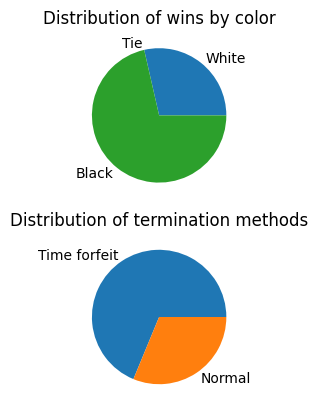

In [22]:
dashboard.export("example.png")